**目的**:非结构化数据往往占用比较
多的储存空间，文件本身也会比较大，运算非常缓慢，我们希望能够在保证数据质量的前提下，尽量地缩小非结构
化数据的大小，或者简化非结构化数据的结构  
[求距离1——pairwise_distances_argmin()方法，返回目标最近的标签值](https://blog.csdn.net/weixin_42727069/article/details/94615972)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
%matplotlib inline

### 加载数据

In [2]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

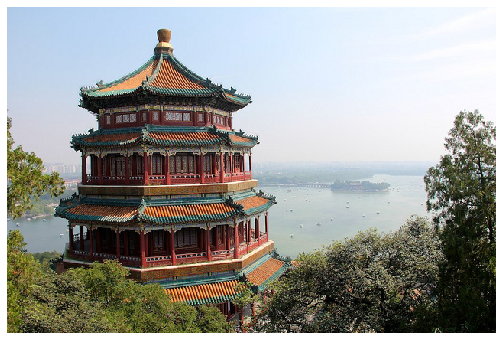

In [6]:
plt.figure(figsize=(12, 6))
plt.axis("off")
plt.imshow(china)
plt.savefig("./imgs/china.png")
plt.show()

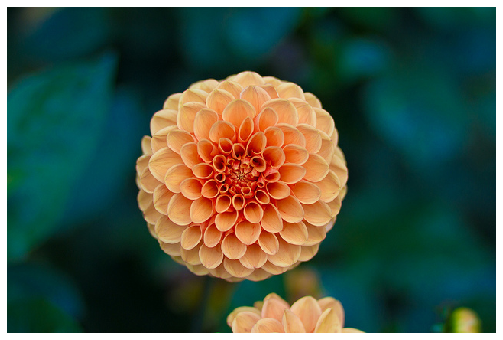

In [7]:
plt.figure(figsize=(12, 6))
plt.axis("off")
plt.imshow(flower)
plt.show()

### 探索数据类型

In [8]:
# 格式
china.dtype

dtype('uint8')

In [9]:
# 形状
china.shape

(427, 640, 3)

In [10]:
# 取出一个像素点的数据
china[0][0]

array([174, 201, 231], dtype=uint8)

In [11]:
newimg = china.reshape((427*640), 3)
newimg.shape

(273280, 3)

In [12]:
df = pd.DataFrame(newimg)
df.drop_duplicates(inplace=True)
# 消除相同的像素点, 只有9W多个有效的像素点
df.shape

(96615, 3)

### 建立模型 

In [13]:
n_cluster = 64

china = np.array(china, dtype=np.float64)/china.max()
w, h, d = oeiginal_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w*h, d))

In [14]:
# 数据量化, 当数据量过大时,可以使用部分数据
# 进行训练得到各个簇的质心，而后用全部数据进行
# 的预于每一个样本属于哪一个簇
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(image_array_sample)

In [15]:
kmeans.cluster_centers_

array([[0.11798806, 0.11884058, 0.07007673],
       [0.80874811, 0.82262443, 0.85671192],
       [0.47614379, 0.46895425, 0.27124183],
       [0.92831097, 0.95803234, 0.99566563],
       [0.52      , 0.5254902 , 0.39529412],
       [0.61895425, 0.67712418, 0.70816993],
       [0.31198257, 0.34030501, 0.18954248],
       [0.82923351, 0.90641711, 0.98743316],
       [0.80392157, 0.53006536, 0.3751634 ],
       [0.25202614, 0.23764706, 0.20104575],
       [0.03328773, 0.02836297, 0.01732786],
       [0.3454902 , 0.1854902 , 0.12470588],
       [0.52156863, 0.49150327, 0.52592593],
       [0.74457516, 0.83934641, 0.95045752],
       [0.72941176, 0.35764706, 0.23137255],
       [0.41470588, 0.44656863, 0.40980392],
       [0.96176471, 0.77058824, 0.63039216],
       [0.69019608, 0.74705882, 0.7605042 ],
       [0.57019608, 0.41098039, 0.34588235],
       [0.93630422, 0.93594771, 0.94913844],
       [0.3875817 , 0.45620915, 0.10588235],
       [0.56684492, 0.62388592, 0.64171123],
       [0.

In [16]:
label = kmeans.predict(image_array)
label.shape

(273280,)

In [17]:
# 质心的映射
image_kmeans =  image_array.copy()
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[label[i]]

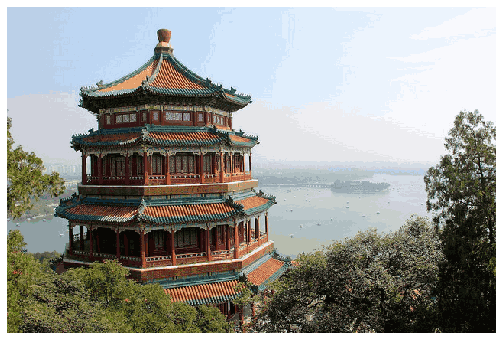

In [18]:
image_kmeans = image_kmeans.reshape(w, h, d)
plt.figure(figsize=(12, 6))
plt.axis("off")
plt.imshow(image_kmeans)
plt.savefig("./imgs/Rchina.png")
plt.show()

In [19]:
n_clusters = 64
# 随机初始化了n个质心
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]

print(centroid_random.shape)
# (x1, x2) 以x2中的每一个点计算与x1中每一个样本的欧氏距离,并最后x1的index
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random

(64, 3)


array([55, 55, 55, ..., 52, 60, 60])

In [134]:
len(set(labels_random))

64

In [133]:
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
    
image_random = image_random.reshape(w, h, d)
image_random.shape

(427, 640, 3)

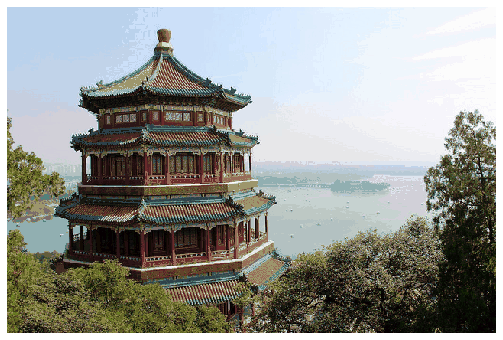

In [132]:
plt.figure(figsize=(12, 6))
plt.axis("off")
plt.imshow(image_random)
plt.show()